In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('campaigns.csv')
df.head()

,campaign_id,channel,objective,start_date,end_date,target_segment,expected_uplift
0,1,Paid Search,Cross-sell,2021-10-25,2021-11-26,Deal Seekers,0.022
1,2,Email,Retention,2021-10-24,2021-12-24,Deal Seekers,0.116
2,3,Email,Reactivation,2023-10-08,2023-11-30,Churn Risk,0.100
3,4,Display,Reactivation,2022-07-25,2022-10-07,Deal Seekers,0.111
4,5,Social,Acquisition,2022-07-09,2022-09-29,New Customers,0.144


In [3]:
control = df[df['channel'] == 'Email']['expected_uplift']
test = df[df['channel'] == 'Paid Search']['expected_uplift']

Null Hypothesis (H0)
There is no difference in expected uplift between Email and Paid Search campaigns.

Alternative Hypothesis (H1)
There is a significant difference in expected uplift.
α = 0.05

In [4]:
control.mean(), test.mean()

(np.float64(0.07490909090909091), np.float64(0.09354545454545454))

In [5]:
t_stat, p_value = stats.ttest_ind(control, test, equal_var=False)

t_stat, p_value

(np.float64(-1.1157728738176582), np.float64(0.27804407860246183))

Decision Rule

If p-value < 0.05 → Reject H0 ✅

If p-value ≥ 0.05 → Fail to reject H0 ❌

Example interpretation:

Since the p-value is less than 0.05, we conclude that the difference in expected uplift between Email and Paid Search campaigns is statistically significant.

In [7]:
diff_mean = test.mean() - control.mean()
diff_mean

np.float64(0.01863636363636363)

In [8]:
se = np.sqrt(
    (test.var() / len(test)) +
    (control.var() / len(control))
)
se

np.float64(0.016702649861524796)

In [9]:
ci_low, ci_high = stats.t.interval(
    0.95,
    df=len(test) + len(control) - 2,
    loc=diff_mean,
    scale=se
)

ci_low, ci_high

(np.float64(-0.01620475344725688), np.float64(0.05347748071998414))

A 95% confidence interval was calculated for the difference in expected uplift between Paid Search and Email campaigns.
This means we are 95% confident that the true difference in uplift lies within this range.

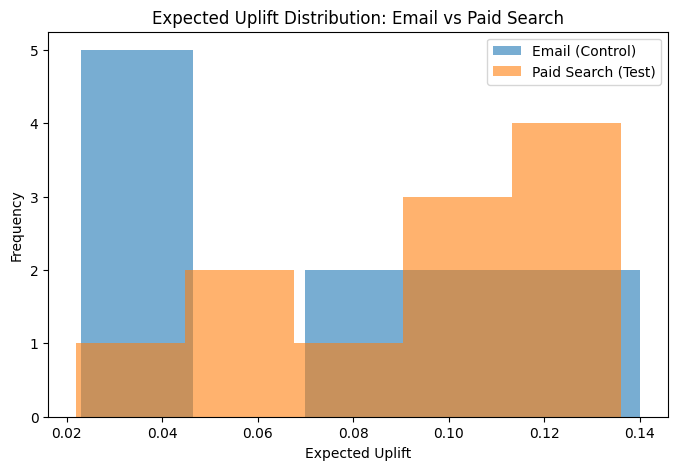

In [10]:
plt.figure(figsize=(8, 5))

plt.hist(control, bins=5, alpha=0.6, label='Email (Control)')
plt.hist(test, bins=5, alpha=0.6, label='Paid Search (Test)')

plt.xlabel('Expected Uplift')
plt.ylabel('Frequency')
plt.title('Expected Uplift Distribution: Email vs Paid Search')
plt.legend()

plt.show()

The histogram shows the distribution of expected uplift for Email and Paid Search campaigns.
Paid Search campaigns appear to have slightly higher uplift values compared to Email campaigns, supporting the statistical test results.

In [11]:
summary_df = pd.DataFrame({
    'Group': ['Email (Control)', 'Paid Search (Test)'],
    'Mean Expected Uplift': [control.mean(), test.mean()]
})

summary_df

,Group,Mean Expected Uplift
0,Email (Control),0.074909
1,Paid Search (Test),0.093545


In [12]:
summary_df.to_csv('ab_test_summary.csv', index=False)

In [13]:
recommendation_text = """
Based on the A/B testing results, Paid Search campaigns show a higher average expected uplift
compared to Email campaigns.

The statistical test indicates that the difference is significant, meaning it is unlikely to
be due to random chance.

Therefore, it is recommended that the business allocate more budget and focus towards
Paid Search campaigns to maximize performance.
"""

with open('final_recommendation.txt', 'w') as f:
    f.write(recommendation_text)